[-7.72168659] [1.93507155] [3.90370704]


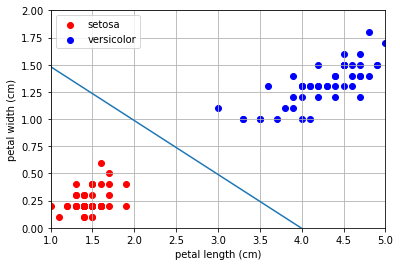

In [1]:

#********* question 7 - a ********#

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# from autograd import grad
# from sklearn import linear_model
iris = datasets.load_iris()
# get labels (for 2 classes only) and features
y = iris.target
#petal length
x1 = iris.data[y<2,2]
# petal width
x2 = iris.data[y<2,3]
y = y[y<2]
x=np.array([x1,x2])
# print(x)
x=x.T
# print(x.shape,y.shape)
# scatter plot
colors=('r','b')
for target in range(2):
    plt.scatter(x1[y==target],x2[y==target],c=colors[target])
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# train my model
def model(x_p,w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p,w[1:])
    return a

#********************************cross_entropy***********************************#
# define sigmoid
def sigmoid(t):
    return 1/(1+np.exp(-t))

# cross-entropy function
def cross_entropy(w,x,y):
    # compute sigmoid of model
    a = sigmoid(model(x,w))    
    # compute cost of label 0 points
    ind = np.argwhere(y==0)[:,0]
    cost = -np.sum(np.log(1-a[ind,:]))
    # add cost of label 0 points
    ind = np.argwhere(y==1)[:,0]
    cost -= np.sum(np.log(a[ind,:]))
    # compute cross-entropy
    return cost/y.size
#********************************cross_entropy***********************************#

def self_gradienr(g):
    def partial(w):
        gap=0.0001
        w0_a=[w[0]-w[0]*0.00005, w[1], w[2]]
        w0_b=[w[0]+w[0]*0.00005, w[1], w[2]]
        w1_a=[w[0], w[1]-w[1]*0.00005, w[2]]
        w1_b=[w[0], w[1]+w[1]*0.00005, w[2]]
        w2_a=[w[0], w[1], w[2]-w[2]*0.00005]
        w2_b=[w[0], w[1], w[2]+w[2]*0.00005]
        
        w0_gradient=(g(w0_b)-g(w0_a))/(gap*w[0])
        w1_gradient=(g(w1_b)-g(w1_a))/(gap*w[1])
        w2_gradient=(g(w2_b)-g(w2_a))/(gap*w[2])
        
        return [w0_gradient, w1_gradient, w2_gradient]
    return partial
def gradient_descent(g, step, max_its, w, p):
    # compute gradient
    gradient = self_gradienr(g)
    # gradient descent loop
    #w = np.array([[1.], [1.]])
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step
        w = w - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

def c(t):
    c = cross_entropy(t,x,y)
    return c

iter=100
w = np.array([[1.], [1.], [1.]])

a, b = gradient_descent(c,0.1,iter,w,0)
# print(a,b)
# plt.figure(0)
# plt.plot(b)
# plt.figure(1)
# xp=np.array([np.linspace(0,3,20)])
# xp=xp.reshape(-1,1)
# plt.plot(xp,sigmoid(model(xp,a[iter])))

xp=[1, 5]
yp=-(a[100][0]+a[100][1]*xp)/a[100][2]
# plt.plot(xp,a[100][0]+a[100][1]*xp)
plt.plot(xp,yp)
plt.xlim(1, 5)
plt.ylim(0, 2)
print(a[100][0],a[100][1],a[100][2])
# print(a)

(100, 2) (100,)


ValueError: operands could not be broadcast together with shapes (100,) (2,) 

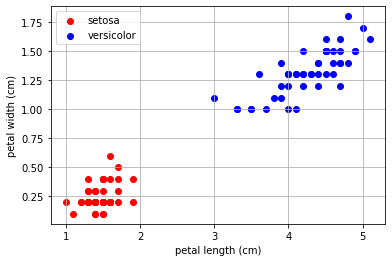

In [10]:

#********* question 7 - b ********#

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# from sklearn import linear_model
iris = datasets.load_iris()
# get labels (for 2 classes only) and features
y = iris.target
#petal length
x1 = iris.data[y<2,2]
# petal width
x2 = iris.data[y<2,3]
y = y[y<2]
#replace 0 with -1
y[y==0] = -1
# print (y)
x=np.array([x1,x2])
# print(x)
x=x.T
# print(x.shape,y.shape)
# scatter plot
colors=('r','b')
plt.scatter(x1[y==-1],x2[y==-1],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# train my model
def model(x_p,w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p,w[1:])
    return a.T
#********************************softmax***********************************#
# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
print(x.shape,y.shape)
print(model(x,w).shape,-y*model(x,w))
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))
#********************************softmax***********************************#

def self_gradienr(g):
    def partial(w):
        gap=0.0001
        w0_a=[w[0]-w[0]*0.00005, w[1], w[2]]
        w0_b=[w[0]+w[0]*0.00005, w[1], w[2]]
        w1_a=[w[0], w[1]-w[1]*0.00005, w[2]]
        w1_b=[w[0], w[1]+w[1]*0.00005, w[2]]
        w2_a=[w[0], w[1], w[2]-w[2]*0.00005]
        w2_b=[w[0], w[1], w[2]+w[2]*0.00005]
        
        w0_gradient=(g(w0_b)-g(w0_a))/(gap*w[0])
        w1_gradient=(g(w1_b)-g(w1_a))/(gap*w[1])
        w2_gradient=(g(w2_b)-g(w2_a))/(gap*w[2])
        
        return [w0_gradient, w1_gradient, w2_gradient]
    return partial


def gradient_descent(g, step, max_its, w, p):
    # compute gradient
    gradient = self_gradienr(g)
    # gradient descent loop
    #w = np.array([[1.], [1.]])
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step
        w = w - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

def c(t):
    c = softmax(t)
    return c

iter=100
w = np.array([[1.], [1.], [1.]])
a, b = gradient_descent(c,0.1,iter,w,0)
xp=[0, 5]
yp=-(a[100][0]+a[100][1]*xp)/a[100][2]
# plt.plot(xp,a[100][0]+a[100][1]*xp)

plt.plot(xp,yp)
plt.xlim(1, 5)
plt.ylim(0, 2)
print(a[100][0],a[100][1],a[100][2])
# print(a)

[-4.36843846] [1.35355984] [0.54465742]


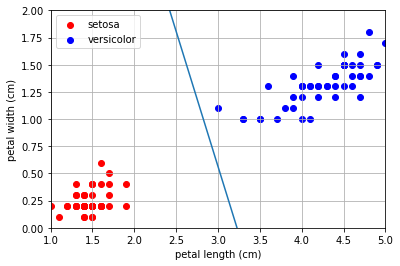

In [3]:

#********* question 7 - c ********#

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# from sklearn import linear_model
iris = datasets.load_iris()
# get labels (for 2 classes only) and features
y = iris.target
#petal length
x1 = iris.data[y<2,2]
# petal width
x2 = iris.data[y<2,3]
y = y[y<2]
#replace 0 with -1
y[y==0] = -1
# print (y)
x=np.array([x1,x2])
# print(x)
x=x.T
# print(x.shape,y.shape)
# scatter plot
colors=('r','b')
plt.scatter(x1[y==-1],x2[y==-1],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
#********************************svm***********************************#
def soft_margin_svm(w):
    cost = np.sum(np.log(1 + np.exp( 1 - y * model(x,w))) + 0.3 * np.linalg.norm(w[1:]))
    return cost/float(np.size(y))
#********************************svm***********************************#

# train my model
def model(x_p,w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p,w[1:])
    return a.T

def self_gradienr(g):
    def partial(w):
        gap=0.0001
        w0_a=[w[0]-w[0]*0.00005, w[1], w[2]]
        w0_b=[w[0]+w[0]*0.00005, w[1], w[2]]
        w1_a=[w[0], w[1]-w[1]*0.00005, w[2]]
        w1_b=[w[0], w[1]+w[1]*0.00005, w[2]]
        w2_a=[w[0], w[1], w[2]-w[2]*0.00005]
        w2_b=[w[0], w[1], w[2]+w[2]*0.00005]
        
        w0_gradient=(g(w0_b)-g(w0_a))/(gap*w[0])
        w1_gradient=(g(w1_b)-g(w1_a))/(gap*w[1])
        w2_gradient=(g(w2_b)-g(w2_a))/(gap*w[2])
        
        return [w0_gradient, w1_gradient, w2_gradient]
    return partial


def gradient_descent(g, step, max_its, w, p):
    # compute gradient
    gradient = self_gradienr(g)
    # gradient descent loop
    #w = np.array([[1.], [1.]])
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step
        w = w - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

def c(t):
    c = soft_margin_svm(t)
    return c

iter=100
w = np.array([[1.], [1.], [1.]])
a, b = gradient_descent(c,0.1,iter,w,0)
xp=[1, 5]
yp=-(a[100][0]+a[100][1]*xp)/a[100][2]
# plt.plot(xp,a[100][0]+a[100][1]*xp)

plt.plot(xp,yp)
plt.xlim(1, 5)
plt.ylim(0, 2)
print(a[100][0],a[100][1],a[100][2])
# print(a)

In [5]:
Why the result is similar in (a) and (b)?
    Because cross entropy and softmax can be tranversed to each other, 
    they are basically designed in the same way, expect the lable is different, 
    that's why they have samilar outcomes.

Why the result is different in (c)?
    Because (c) is a different loss function compared with (a) and (b),
    which means they have different global minimum, 
    leading to the different paramater of our model.
    
    
    
    
    
    
    

SyntaxError: invalid syntax (135374794.py, line 1)